In [6]:
using JuMP
using Cbc
using Random
using Plots

## y=ax+bの疑似データ作成

In [11]:
a = 1.5
b = 0.3
n = 20
ϵ = 0.1
x = rand(n)
y = a * x .+ b .+ ϵ * randn(n);
xx = 0:0.01:1;
yy = a * xx .+ b;

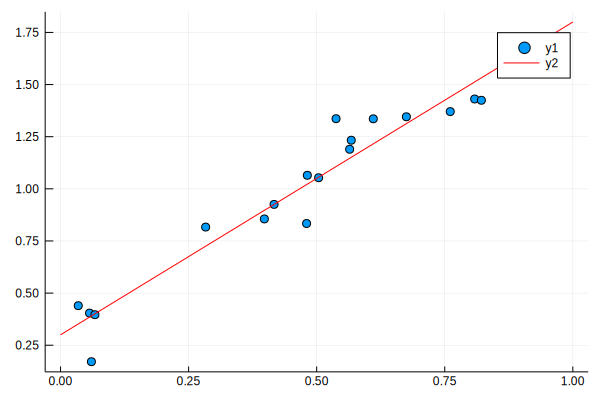

In [13]:
scatter(x, y, mark=:circle)
plot!(xx, yy, color=:red)

## aとbを当てる (9ページ)

In [19]:
model = Model(with_optimizer(Cbc.Optimizer))

@variable(model, a)
@variable(model, b)
@variable(model, z[1:n] >= 0)

for i in 1:n
    @constraint(model, y[i] - (a * x[i] + b) ≥ - z[i])
    @constraint(model, y[i] - (a * x[i] + b) ≤ z[i])
end

@objective(model, Min, sum(z[:]))

@show model

model = A JuMP Model
Minimization problem with:
Variables: 22
Objective function type: GenericAffExpr{Float64,VariableRef}
`GenericAffExpr{Float64,VariableRef}`-in-`MathOptInterface.GreaterThan{Float64}`: 20 constraints
`GenericAffExpr{Float64,VariableRef}`-in-`MathOptInterface.LessThan{Float64}`: 20 constraints
`VariableRef`-in-`MathOptInterface.GreaterThan{Float64}`: 20 constraints
Model mode: AUTOMATIC
CachingOptimizer state: EMPTY_OPTIMIZER
Solver name: COIN Branch-and-Cut (Cbc)
Names registered in the model: a, b, z


A JuMP Model
Minimization problem with:
Variables: 22
Objective function type: GenericAffExpr{Float64,VariableRef}
`GenericAffExpr{Float64,VariableRef}`-in-`MathOptInterface.GreaterThan{Float64}`: 20 constraints
`GenericAffExpr{Float64,VariableRef}`-in-`MathOptInterface.LessThan{Float64}`: 20 constraints
`VariableRef`-in-`MathOptInterface.GreaterThan{Float64}`: 20 constraints
Model mode: AUTOMATIC
CachingOptimizer state: EMPTY_OPTIMIZER
Solver name: COIN Branch-and-Cut (Cbc)
Names registered in the model: a, b, z

In [20]:
optimize!(model)

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Oct  7 2019 

command line - Cbc_C_Interface -solve -quit (default strategy 1)
Presolve 40 (0) rows, 22 (0) columns and 120 (0) elements
Perturbing problem by 0.001% of 0.98539064 - largest nonzero change 9.2432403e-06 ( 0.0023488992%) - largest zero change 0
0  Obj 0 Primal inf 31.375808 (20)
22  Obj 1.5145214
Optimal - objective value 1.514503
Optimal objective 1.514503006 - 22 iterations time 0.002
Total time (CPU seconds):       0.00   (Wallclock seconds):       0.00



In [21]:
opt_a = value(a)
opt_b = value(b)
println(opt_a)
println(opt_b)

1.4512879097142155
0.32203755443865706


In [22]:
xxx = 0:0.01:1;
yyy = opt_a * xx .+ opt_b;

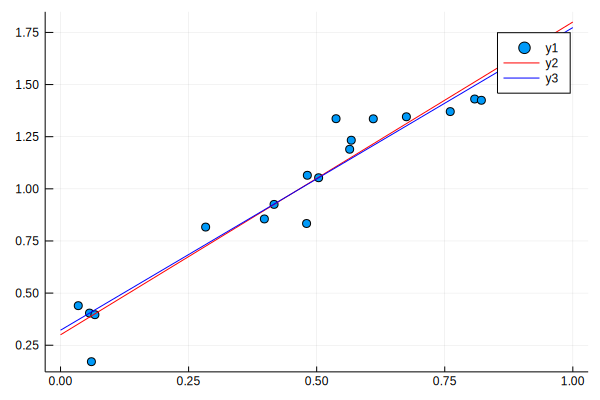

In [23]:
scatter(x, y, mark=:circle)
plot!(xx, yy, color=:red)
plot!(xxx, yyy, color=:blue)